In [ ]:
!pip install seaborn --upgrade

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
plt.style.use('../input/harshmpl/harsh')
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_palette("colorblind")

In [ ]:
### load 2020 survey and split into student, software engineer, data scientist, and research scientis

df_2020 = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
questions_2020 = dict(zip(df_2020.iloc[0, :].T.index, df_2020.iloc[0, :].T))
df_2020 = df_2020.iloc[1:, :]

all_dfs_2020 = dict()
all_dfs_2020["Student"] = df_2020[df_2020["Q5"] == "Student"] 
all_dfs_2020["Software Engineer"] = df_2020[df_2020["Q5"] == "Software Engineer"] 
all_dfs_2020["Data Scientist"] = df_2020[df_2020["Q5"] == "Data Scientist"] 
all_dfs_2020["Research Scientist"] = df_2020[df_2020["Q5"] == "Research Scientist"] 

### load 2019 survey and split into student, software engineer, data scientist, and research scientis

df_2019 = pd.read_csv('/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv')
questions_2019 = dict(zip(df_2019.iloc[0, :].T.index, df_2019.iloc[0, :].T))
df_2019 = df_2019.iloc[1:, :]

all_dfs_2019 = dict()
all_dfs_2019["Student"] = df_2019[df_2019["Q5"] == "Student"] 
all_dfs_2019["Software Engineer"] = df_2019[df_2019["Q5"] == "Software Engineer"] 
all_dfs_2019["Data Scientist"] = df_2019[df_2019["Q5"] == "Data Scientist"] 
all_dfs_2019["Research Scientist"] = df_2019[df_2019["Q5"] == "Research Scientist"] 

### load 2018 survey and split into student, software engineer, data scientist, and research scientis

df_2018 = pd.read_csv('/kaggle/input/kaggle-survey-2018/multipleChoiceResponses.csv')
questions_2018 = dict(zip(df_2018.iloc[0, :].T.index, df_2018.iloc[0, :].T))
df_2018 = df_2018.iloc[1:, :]

all_dfs_2018 = dict()
all_dfs_2018["Student"] = df_2018[df_2018["Q6"] == "Student"] 
all_dfs_2018["Software Engineer"] = df_2018[df_2018["Q6"] == "Software Engineer"] 
all_dfs_2018["Data Scientist"] = df_2018[df_2018["Q6"] == "Data Scientist"] 
all_dfs_2018["Research Scientist"] = df_2018[df_2018["Q6"] == "Research Scientist"] 

### load 2017 survey and split into student, software engineer, data scientist, and research scientis

df_2017 = pd.read_csv("../input/kaggle-survey-2017/multipleChoiceResponses.csv", encoding='latin-1')

all_dfs_2017 = dict()
all_dfs_2017["Student"] = df_2017[(df_2017["StudentStatus"] == "Yes")]
all_dfs_2017["Software Engineer"] = df_2017[(df_2017["CurrentJobTitleSelect"] == "Software Developer/Software Engineer")]
all_dfs_2017["Data Scientist"] = df_2017[(df_2017["CurrentJobTitleSelect"] == "Data Scientist")]
all_dfs_2017["Research Scientist"] = df_2017[(df_2017["CurrentJobTitleSelect"] == "Scientist/Researcher")]
             
all_dfs = dict()
all_dfs[2017] = all_dfs_2017
all_dfs[2018] = all_dfs_2018
all_dfs[2019] = all_dfs_2019
all_dfs[2020] = all_dfs_2020

years = np.arange(2017,2021)

### load stack overflow surveys and store them in a dict

df_so_2015 = pd.read_csv("../input/stack-overflow-developer-surveys-20152020/2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.csv", skiprows=1)
cut_2015 = (df_so_2015["Occupation"] == "Data scientist") | (df_so_2015["Occupation"] == "Machine learning developer")

df_so_2016 = pd.read_csv("../input/stack-overflow-developer-surveys-20152020/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv")
cut_2016 = (df_so_2016["occupation"] == "Data scientist") | (df_so_2016["occupation"] == "Machine learning developer") 

df_so_2017 = pd.read_csv("../input/stack-overflow-developer-surveys-20152020/developer_survey_2017/survey_results_public.csv")
cut_2017 = df_so_2017["DeveloperType"].str.contains("Data scientist|Machine learning developer", na=False)

df_so_2018 = pd.read_csv("../input/stack-overflow-developer-surveys-20152020/developer_survey_2018/survey_results_public.csv")
cut_2018 = df_so_2018["DevType"].str.contains("Data scientist or machine learning specialist", na=False)

df_so_2019 = pd.read_csv("../input/stack-overflow-developer-surveys-20152020/developer_survey_2019/survey_results_public.csv")
cut_2019 = df_so_2019["DevType"].str.contains("Data scientist or machine learning specialist", na=False)

df_so_2020 = pd.read_csv("../input/stack-overflow-developer-surveys-20152020/developer_survey_2020(1)/survey_results_public.csv")
cut_2020 = df_so_2020["DevType"].str.contains("Data scientist or machine learning specialist", na=False)

all_dfs_so = dict()
all_dfs_so[2015] = df_so_2015[cut_2015]
all_dfs_so[2016] = df_so_2016[cut_2016]
all_dfs_so[2017] = df_so_2017[cut_2017]
all_dfs_so[2018] = df_so_2018[cut_2018]
all_dfs_so[2019] = df_so_2019[cut_2019]
all_dfs_so[2020] = df_so_2020[cut_2020]


In [ ]:
def fraction_by_field_profession_all_years(fields, profession, question_numbers, ignore_2017=False, worktool_2017=False):
    """
    fields and question_numbers is list of question numbers for years 2018, 2019, and 2020 kaggle surveys.
    returns fraction for every year given the profession
    """
    years = np.arange(2017,2021)
    
    if(ignore_2017): #2017 is weird and sometimes does not have the same question
        return np.array([np.nan] + [len(all_dfs[years[i]][profession][all_dfs[years[i]][profession][question_numbers[i]] == fields[i]])
                /len(all_dfs[years[i]][profession]) 
                for i in range(1,len(years))])
    else:
        if(worktool_2017): #2017 "WorkTools" are categorized differently and need a different way to be counted
            field_2017 = (~all_dfs[2017][profession][questions[0]].isna()).sum()/(len(all_dfs[2017][profession]))
            return np.array([field_2017] + [len(all_dfs[years[i]][profession][all_dfs[years[i]][profession][question_numbers[i]] == fields[i]])
                /len(all_dfs[years[i]][profession]) 
                for i in range(1,len(years))])
        else:
            return np.array([len(all_dfs[years[i]][profession][all_dfs[years[i]][profession][question_numbers[i]] == fields[i]])
                /len(all_dfs[years[i]][profession]) 
                for i in range(len(years))])
        
def fraction_by_field_by_year_stack_overflow(question_string, year, field, ignore_year=False):
    """
    question_string is the question name and field is the thing to compare to. some years are weird so ignore_year will ignore them
    returns fraction year given the question 
    """
    if(ignore_year):
        return np.nan
    
    df = all_dfs_so[year][question_string] #load dataframe column for the question and year
    
    if year == 2015: #2015 survey format is different
        return df.count()/len(df)
    else: 
        return len(np.where(df.str.contains(field, na=False))[0])/(len(df) - df.isna().sum())

def fraction_by_field_all_years_stack_overflow(question_strings, fields, ignore_year=[False]*6):
    """
    return fraction for all years for stack overflow surveys
    """
    years = np.arange(2015, 2021)
    return np.array([fraction_by_field_by_year_stack_overflow(question_strings[i], years[i], fields[i], ignore_year[i]) for i in range(len(years))])

def set_ax_ticks_labels_percentage_plot(ax, high, increment=50, low=None):
    """helper to reduce clutter in plotting code"""
    if(low is None):
        low = -high
    ax.set_ylim([low,high])
    arr = np.arange(low, high+1, increment) #in increments of increment and need +1 to include high
    ax.set_yticks(arr)
    ax.set_yticklabels("+" + str(x) + '%' if x > 0 else str(x) + "%" for x in arr )
    return 0

def calc_percent(arr):
    """returns percentage change from the first non-nan value in arr"""
    start = np.where(~np.isnan(arr))[0][0] #get baseline
    perc = np.concatenate([np.array([np.nan]), 100*(np.diff(arr)/arr[0:-1])])
    perc[start] = 0
    return perc

def plot_kaggle_ax_fraction(ax, years, student, ds, se, rs, ylim=[0,1], xlim=[2017-0.1,2020+0.1], legend=True, title=None, no_2017=False):
    """helper function to making plotting code less clusttered. plots fraction of respondents for Kaggle over time"""
    ax.plot(years, student, '-', marker='o', markersize=20, label="Student")
    ax.plot(years, ds, '-', marker='o', markersize=20, label="Data Scientist")
    ax.plot(years, se, '-', marker='o', markersize=20, label="Software Engineer")
    ax.plot(years, rs, '-', marker='o', markersize=20, label="Research Scientist")
    ax.set(ylim=ylim, xlim=xlim, xticks=years, xticklabels=[str(x) for x in years])
    if legend:
        ax.legend(loc='best', frameon=False, fontsize=24)
    if no_2017:
        ax.fill([2017, 2018, 2018, 2017], [-150, -150, 150, 150], fill=False, hatch='//', color='gray')
    ax.set_xlabel("Year", fontsize=28)
    ax.set_ylabel("Fraction of Respondents", fontsize=28)
    ax.set_title(title, y=1.03, fontsize=28)
    ax.set_xlim(xlim)
    return 0

def plot_kaggle_ax_percent(ax, years, student, ds, se, rs, xlim=[2017-0.1,2020+0.1], title=None, no_2017=False, high=100, low=-100, increment=50, color_bg=True):
    """helper function to making plotting code less clusttered. plots percentage change for Kaggle responses for given field over time"""
    ax.plot(years, calc_percent(student), '-', marker='o', markersize=20, label="Student")
    ax.plot(years, calc_percent(ds), '-', marker='o', markersize=20, label="Data Scientist")
    ax.plot(years, calc_percent(se), '-', marker='o', markersize=20, label="Software Engineer")
    ax.plot(years, calc_percent(rs), '-', marker='o', markersize=20, label="Research Scientist")
    set_ax_ticks_labels_percentage_plot(ax, high=high, low=low, increment=increment)
    ax.set_xlabel("Year", fontsize=28)
    ax.set_ylabel("Yearly Percentage Change", fontsize=28)
    ax.set(xlim=xlim, xticks=years, xticklabels=[str(x) for x in years])
    ax.set_title(title, y=1.03, fontsize=28)
    
    if no_2017:
        ax.fill([2017, 2018, 2018, 2017], [-150, -150, 150, 150], fill=False, hatch='//', color='gray')
    
    if color_bg:
        ax.axhspan(0,300,color='mediumseagreen', alpha=0.07)
        ax.axhspan(-300,0,color='indianred', alpha=0.07)
    return 0

def plot_kaggle_stackoverflow_ax_fraction(ax, years, frac_kag, frac_so, ylim=[0,1], xlim=[2017-0.1,2020+0.1], legend=True, title=None, no_2017=False):
    """helper function to making plotting code less clusttered. plots percentage change for Kaggle/SO responses for given field over time"""
    ax.plot(years, frac_so, '-', marker='o', markersize=20, label="Stack Overflow")
    ax.plot(years[2:], frac_kag, '-', marker='o', markersize=20, label="Kaggle")
    ax.set(ylim=ylim, xlim=xlim, xticks=years, xticklabels=[str(x) for x in years])
    if legend:
        ax.legend(loc='best', frameon=False, fontsize=24)
    if no_2017:
        ax.fill([2017, 2018, 2018, 2017], [-150, -150, 150, 150], fill=False, hatch='//', color='gray')
    ax.set_xlabel("Year", fontsize=28)
    ax.set_ylabel("Fraction of Respondents", fontsize=28)
    ax.set_title(title, y=1.03, fontsize=28)
    return 0

def plot_kaggle_stackoverflow_ax_percent(ax, years, frac_kag, frac_so, xlim=[2017-0.1,2020+0.1], title=None, no_2017=False, high=100, low=-100, increment=50, color_bg=True):
    """helper function to making plotting code less clusttered. plots percentage change for Kaggle/SO responses for given field over time"""
    ax.plot(years, calc_percent(frac_so), '-', marker='o', markersize=20, label="Stack Overflow")
    ax.plot(years[2:], calc_percent(frac_kag), '-', marker='o', markersize=20, label="Kaggle")
    set_ax_ticks_labels_percentage_plot(ax, high=high, low=low, increment=increment)
    ax.set_xlabel("Year", fontsize=28)
    ax.set_ylabel("Yearly Percentage Change", fontsize=28)
    ax.set(xlim=xlim, xticks=years, xticklabels=[str(x) for x in years])
    ax.set_title(title, y=1.03, fontsize=28)
    if no_2017:
        ax.fill([2017, 2018, 2018, 2017], [-150, -150, 150, 150], fill=False, hatch='//', color='gray')
    if color_bg:
        ax.axhspan(0,300,color='mediumseagreen', alpha=0.07)
        ax.axhspan(-300,0,color='indianred', alpha=0.07)
    return 0

In [ ]:
coding_years = dict() #dict to hold # of years coding experience 

coding_years["0-1"] = df_2020[(df_2020["Q6"] == "I have never written code") | (df_2020["Q6"] == "< 1 years")]
coding_years["1-3"] = df_2020[(df_2020["Q6"] == "1-2 years")]
coding_years["3-5"] = df_2020[(df_2020["Q6"] == "3-5 years")]
coding_years["5-10"] = df_2020[(df_2020["Q6"] == "5-10 years")]
coding_years["10-20"] = df_2020[(df_2020["Q6"] == "10-20 years")]
coding_years["20+"] = df_2020[(df_2020["Q6"] == "20+ years")]

year_ranges = ["0-1", "1-3", "3-5", "5-10", "10-20", "20+"] # for column names and year comparisons between ML & coding exp

str_ml = [["Under 1 year", "I do not use machine learning methods"], ["1-2 years", "2-3 years"], ["3-4 years", "4-5 years"],
         "5-10 years", "10-20 years", "20 or more years"] #corresponding year ranges for Q15 about ML experience

occups = ["Student", "Data Scientist", "Software Engineer", "Research Scientist"] #occupations to consider
occups_total_numbers = [len(all_dfs_2020[oc]) for oc in occups] #total number of respondents for the different occupations listed above 

coding_ml_number_of_respondents = np.zeros((len(year_ranges), len(year_ranges)))
coding_ml_majority_respondents = np.zeros((len(year_ranges), len(year_ranges)), dtype='object')

for i in range(len(year_ranges)):
    for j in range(len(year_ranges)):
        code = coding_years[year_ranges[i]] #get the df that holds all responses with experience year_ranges[i]
        
        if(type(str_ml[j]) == list): #this year range has more than one condition
            intersection_code_ml = code[(code["Q15"] == str_ml[j][0]) | (code["Q15"] == str_ml[j][1])]
        else:
            intersection_code_ml = code[(code["Q15"] == str_ml[j])]
        
        coding_ml_number_of_respondents[i,j] = len(intersection_code_ml) #this should be the number of respondents with coding experience year_ranges[i] and ML experience year_ranges[j]
        
        occupations, numbers = np.unique(intersection_code_ml["Q5"].astype(str), return_counts=True) #number of respondents categorized by occupation
        occups_of_interest_numbers = [numbers[np.where(occupations == occups[i])[0]] for i in range(len(occups))] #number of respondents for each categroy that we care about
        occups_of_interest_proportion = [occups_of_interest_numbers[i]/occups_total_numbers[i] for i in range(len(occups))] #divide the number of respondents by the number of total respondents with that occupation to get the proportion
        
        if(sum(occups_of_interest_numbers) > 20): # if it's less than 20 --> don't consider
            coding_ml_majority_respondents[i,j] = occups[np.argmax(occups_of_interest_proportion)] #get the dominant occupation by proportion for coding/ML experience [i,j]
        else:
            coding_ml_majority_respondents[i,j] = "None"

# The Evolution of Tools in Data Science Over the Past Five Years 


In [ ]:
trends = pd.read_csv("../input/googletrendsdatascience/multiTimeline.csv", delimiter=',', skiprows=1) # load google trends data
trends["Month"] = pd.to_datetime(trends['Month'])
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(trends["Month"], trends["data science: (United States)"], label='Data Science')
ax.plot(trends["Month"], trends["machine learning: (United States)"], label='Machine Learning')
ax.set(ylim=[0,100], xlim=[min(trends["Month"]), max(trends["Month"])], xlabel="Year", ylabel="Google Trend Score")
ax.tick_params(axis='x', rotation=30, pad=-0.05, labelsize=22)
ax.tick_params(axis='y', labelsize=22)
ax.set_title("Interest in Data Science & ML Over Time", fontsize=28, y=1.05)
ax.text(0.82, 0.02, "Source: Google Trends", fontsize=10, transform=ax.transAxes)
ax.legend(loc='best', fontsize=22)
plt.show()

There has been an **explosion** of interest in data science and machine learning over the past few years as shown in the figure above. **2015** in particular seems to be marking a turning point in the volume of Google search interest. 

This heightened attention to data science is also reflected in other indicators. In these five short years (2015-2020), the collective value of data-driven businesses has almost [**tripled**](https://towardsdatascience.com/how-data-science-will-impact-future-of-businesses-7f11f5699c4d) to \\$1.2 trillion from \$333 billion in 2015. Moreover, experts believe that there will be [11.5 million new jobs](https://www.calu.edu/academics/undergraduate/bachelors/data-science/jobs-career-salaries.aspx) in data science by 2026. The field is booming by all accounts. Even though data science as a field is in its relative infancy, we are at a unique point in time -- we finally have a long enough baseline (through the <span style="background-color:#5dd0ff;color:white">Kaggle</span> [survey](https://insights.stackoverflow.com/survey/) and the <span style="background-color:#f5964b;color:white">Stack Overflow</span> [survey](https://insights.stackoverflow.com/survey/)) to gain insights about how different aspects of data science are changing in the long term. 

### To narrow the scope a bit, the guiding question for this notebook is: how has the <span style="color:#6495ed">popularity</span> and <span style="color:#cd5c5c">utility</span> of different tools in data science changed over time?


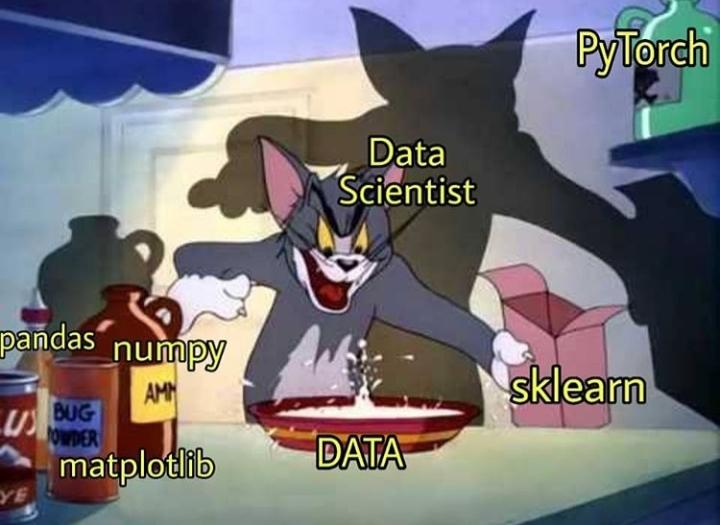




Data science and machine learning are always abuzz with new tools, languages, and techniques. But a lot of these do not end up withstanding the test of time (or our love for shiny new things). <span style="background-color:#5dd0ff;color:white">Kaggle</span> has now been running the machine learning & data science survey for four years now. Concurrently, the folks at <span style="background-color:#f5964b;color:white">Stack Overflow</span>
 have been running a similar, albeit broader, [survey](https://insights.stackoverflow.com/survey/) for the larger developer community for the last nine years. Though the content of these two surveys is fairly different, there is one major similarity: **data scientists fill out both surveys in large numbers.** For this notebook, I will use data from both these surveys: <span style="background-color:#5dd0ff;color:white">Kaggle</span> from 2017-2020 and <span style="background-color:#f5964b;color:white">Stack Overflow</span> from 2015-2020. 
 
#### Through this kernel, I hope to assess how Kagglers with different skillsets and goals use different programming languages, machine learning libraries, IDEs, libraries, and notebook-hosting services over time.  



To begin our analysis, we need to address two essential questions:
* How are we going to categorize <span style="background-color:#5dd0ff;color:white">Kagglers</span>? 
* How are we going to compare the responses from different years and the two different surveys? 

***No two Kagglers are the same***. The <span style="background-color:#5dd0ff;color:white">Kaggle</span> community is wildly diverse. To answer the question about what tools are popular in data science, we need to find a way to categorize different <span style="background-color:#5dd0ff;color:white">Kagglers</span>. As one might expect, a beginner's toolkit and a research scientist's toolkit are probably vastly different. 

I loved the approach in the [2019 winning kernel](https://www.kaggle.com/tkubacka/a-story-told-through-a-heatmap) of having the two independent dimensions be the # of years of coding experience and the # of years of ML experience. This approach yielded a nice, interpretable set of categories: beginners, data scientists, ML veterans, and coders in transition. However, since we want to look at trends *over time*, the added independent dimenison of time makes visualizations slightly more complicated (GIFs of heatmaps someday?) 

Therefore, I decided to simplify my approach a bit and use the following self-reported respondent titles as categories: <span style="color:#0173b2">students</span>, <span style="color:#de8f05">data scientists</span>, <span style="color:#029e72">software engineers</span>, and <span style="color:#d55e00">research scientists</span>. 

These four occupations are roughly proxies for the different categories that the author of the 2019 winning kernel found by analyzing the differences in both coding and ML experience and represent a majority of the respondents to the 2020 survey. In the heatmap below (heavily inspired from that kernel), I show the number of respondents as a function of coding experience and machine learning experience. 

Each square is colored categorically by the largest ***proportion of respondents*** with a given occupation (from <span style="color:#0173b2">students</span>, <span style="color:#de8f05">data scientists</span>, <span style="color:#029e72">software engineers</span>, and <span style="color:#d55e00">research scientists</span>) who hold that amount of coding & ML experience. For instance, if 20% of <span style="color:#0173b2">students</span>, 10% of <span style="color:#de8f05">data scientists</span>, 5% of <span style="color:#d55e00">research scientists</span>, and 2% of <span style="color:#029e72">software engineers</span> had <1 years of coding & ML experience, that square would be colored "<span style="color:#0173b2">Student</span>". Coloring by the maximum raw number of respondents would bias us a bit -- there are a *lot* of students on Kaggle compared to research scientists. 

In [ ]:
column_row_names = [x + " years" for x in year_ranges]
df = pd.DataFrame(coding_ml_majority_respondents, columns = column_row_names)
fig, ax = plt.subplots(figsize=(14,16))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.9)
value_to_int = {"None":-1, "Student":0, "Data Scientist":1, "Software Engineer":2, "Research Scientist":3} # inspired from https://stackoverflow.com/questions/36227475/heatmap-like-plot-but-for-categorical-variables-in-seaborn
n = len(value_to_int)     
cmap = [(211/255, 211/255, 211/255)] # rgb for #d3d3d3
cmap.extend(list(sns.color_palette("colorblind", 4))) # discrete colormap (n samples from a given cmap)
heatmap = sns.heatmap(df.replace(value_to_int), cmap=cmap, yticklabels=column_row_names, ax=ax, annot=coding_ml_number_of_respondents.astype(int), fmt="d", annot_kws={"fontsize":24}, cbar_ax=cax) 
colorbar = heatmap.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels([x if " " not in x else x.replace(' ', '\n') for x in list(value_to_int.keys())])
colorbar.ax.tick_params(labelsize=18, labelrotation=20)
colorbar.ax.set_title("Majority Respondents \n(By Proportion)", fontsize=18, y=1.06)
ax.set(xlabel="Machine Learning Experience", ylabel="Coding Experience")
ax.tick_params(axis="x", rotation=30, labelsize=20, pad=-0.1)
ax.tick_params(axis="y", labelsize=20)
plt.suptitle("Coding & Machine Learning Experience \nStratified by Occupation", fontsize=36, y=0.98)
plt.show()

The second question we need to address is how we're going to compare responses from different years and how we're going to combine responses between the <span style="background-color:#f5964b;color:white">Stack Overflow</span> survey and the <span style="background-color:#5dd0ff;color:white">Kaggle</span> survey. 

For the former I will compare the counts of the particular response type I'm looking for divided by the total # of responses for whatever occupation I'm considering. Let's say I want to find out how many <span style="color:#de8f05">data scientists</span> use Python over time. I will calculate the fraction of data scientist respondents to the survey who use Python for any given year and normalize it by the total number of **data scientist** respondents for that year. The left panel in the figure below shows what that looks like. 

To quantify how Python use by <span style="color:#de8f05">data scientists</span> is ***changing*** over time, I show the yearly percentage change in the fraction of <span style="color:#de8f05">data scientists</span> using Python I calculated above in the right panel. Each individual data point here shows the percentage increase or decrease compared to the previous year. We start at 0% in 2017 as that is the year of the first survey. 

In [ ]:
field = ["Python"]*4
questions = ["WorkToolsFrequencyPython", "Q16_Part_1", "Q18_Part_1", "Q7_Part_1"]
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)

fig, ax = plt.subplots(1,2,figsize=(26,12))
fig.subplots_adjust(wspace=0.4, hspace=0.3)

years = np.arange(2017,2021)
ax[0].plot(years, ds_frac, '-', marker='o', markersize=20, label="Data Scientist")
ax[0].set(ylim=[0.5,1], xlim=[2016.9,2020.1], xticks=years, xticklabels=[str(x) for x in years])
ax[0].legend(loc='best', frameon=False, fontsize=24)
ax[0].set_xlabel("Year", fontsize=28)
ax[0].set_ylabel("Fraction of Respondents", fontsize=28)
ax[0].set_title("Python", y=1.03, fontsize=28)
ax[0].text(2016.93, 0.76, "%.2f"%(ds_frac[0]*100) + "%", fontsize=24)
ax[0].text(2019.4, 0.91, "%.2f"%(ds_frac[3]*100) + "%", fontsize=24)

ax[1].plot(years, calc_percent(ds_frac), '-', marker='o', markersize=20, label="Data Scientist")
set_ax_ticks_labels_percentage_plot(ax[1], high=100, low=-100, increment=50)
ax[1].set_xlabel("Year", fontsize=28)
ax[1].set_ylabel("Yearly Percentage Change", fontsize=28)
ax[1].set(xlim=[2016.9,2020.1], xticks=years, xticklabels=[str(x) for x in years])
ax[1].set_title("Python", y=1.03, fontsize=28)

ax[1].axhspan(0,300,color='mediumseagreen', alpha=0.07)
ax[1].axhspan(-300,0,color='indianred', alpha=0.07)
ax[1].text(2018.1, 38, "Increasing :)", color="mediumseagreen", fontsize=24)
ax[1].text(2018.1, -38, "Decreasing :(", color="indianred", fontsize=24)
plt.suptitle("Programming Language Use", fontsize=36, y=1.02)
plt.show()

Both the <span style="background-color:#5dd0ff;color:white">Kaggle</span> and the <span style="background-color:#f5964b;color:white">Stack Overflow</span> survey include professional <span style="color:#de8f05">data scientists</span>; <span style="background-color:#f5964b;color:white">Stack Overflow</span> started including them as an occupational category in 2015. The population of <span style="color:#de8f05">data scientists</span> on <span style="background-color:#5dd0ff;color:white">Kaggle</span> and <span style="background-color:#f5964b;color:white">Stack Overflow</span> should be reasonably similar, so we should be able to make direct comparisons between them. 

The <span style="background-color:#f5964b;color:white">Stack Overflow</span> survey does also include <span style="color:#0173b2">students</span> and <span style="color:#029e72">software engineers</span> (no research scientists) as occupations, but comparing them directly to their  <span style="background-color:#5dd0ff;color:white">Kaggle</span> counterparts **would not yield a fair comparison**. <span style="color:#0173b2">Students</span> and <span style="color:#029e72">software engineers</span> go to <span style="background-color:#5dd0ff;color:white">Kaggle</span> and <span style="background-color:#f5964b;color:white">Stack Overflow</span> for fairly different reasons -- therefore, the make-up of those respective samples is probably non-trivially different. 

#### The general format of the Kernel from now on will be:
* First, compare the popularity and utility of a given tool, technique, or framework  on <span style="background-color:#5dd0ff;color:white">Kaggle</span> amongst the four categories (<span style="color:#0173b2">students</span>, <span style="color:#de8f05">data scientists</span>, <span style="color:#029e72">software engineers</span>, and <span style="color:#d55e00">research scientists</span>). 
* Then we will focus exclusively on how data scientists use that tool, technique, and framework, and obtain a longer baseline by combining the <span style="background-color:#5dd0ff;color:white">Kaggle</span> survey with the <span style="background-color:#f5964b;color:white">Stack Overflow</span> survey. 

Let's get started. 


# Programming Language Use On A Regular Basis


In [ ]:
fig, ax = plt.subplots(3,2,figsize=(23,34))
fig.subplots_adjust(wspace=0.4, hspace=0.3)

field = ["Python"]*4
questions = ["WorkToolsFrequencyPython", "Q16_Part_1", "Q18_Part_1", "Q7_Part_1"]

years = np.arange(2017,2021)

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, worktool_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, worktool_2017=True)

plot_kaggle_ax_fraction(ax[0,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Python")
plot_kaggle_ax_percent(ax[0,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Python", high=100, low=-50, increment=50,  no_2017=False)

field = ["SQL"]*4
questions = ["WorkToolsFrequencySQL", "Q16_Part_3", "Q18_Part_3", "Q7_Part_3"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, worktool_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, worktool_2017=True)

plot_kaggle_ax_fraction(ax[1,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="SQL", ylim=[0,0.9])
plot_kaggle_ax_percent(ax[1,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="SQL", high=100, low=-50, increment=50)


field = [r"R"]*4
questions = ["WorkToolsFrequencyR", "Q16_Part_2", "Q18_Part_2", "Q7_Part_2"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, worktool_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, worktool_2017=True)

plot_kaggle_ax_fraction(ax[2,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="R",  ylim=[0,0.8])
plot_kaggle_ax_percent(ax[2,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="R", high=50, low=-50, increment=50)

plt.suptitle("Programming Language Use", fontsize=36, y=0.93)

plt.show()

### Key Insights
* Python is on the up & up. No surprise here. Python is quickly becoming the lingua franca of ML & DS. The strongest trend here is for <span style="color:#0173b2">students</span> -- around 40% more <span style="color:#0173b2">students</span> in 2020 use Python a regular basis compared to 2018! 
* <span style="color:#0173b2">Students</span> also show the most steady growth in yearly percentage change in Python use compared to other occupations. 
* There was a large uptick in Python usage among <span style="color:#029e72">software engineers</span> between 2017 and 2018 but things have been ~steady since. This kind of makes sense -- <span style="color:#029e72">software engineers</span> are more likely to be strong programmers and come from more "traditional" languages. 
* Steady rise in SQL across the board. The most drastic change here in SQL usage is the increase in usage for <span style="color:#029e72">software engineers</span> -- interesting! <span style="color:#d55e00">Research scientists</span>' SQL usage has stayed mostly ~constant. Perhaps they don't deal with databases as much. 
* Constant/slight steady decrease in R usage across the board. <span style="color:#029e72">Software engineers</span> are among the least likely to use R (makes sense since it's a more specialized language.) 
* R seems to be on a bit of a rebound for <span style="color:#de8f05">data scientists</span> and <span style="color:#d55e00">research scientists</span> between 2019 and 2020 -- we should wait and see till the 2021 results to see whether that trend holds. 

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(23,34))
fig.subplots_adjust(wspace=0.4, hspace=0.3)
years = np.arange(2015,2021)

fields = ["Python"]*6
questions = ["Current Lang & Tech: Python", "tech_do", "HaveWorkedLanguage", "LanguageWorkedWith", "LanguageWorkedWith", "LanguageWorkedWith"]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields)

field = ["Python"]*4
questions = ["WorkToolsFrequencyPython", "Q16_Part_1", "Q18_Part_1", "Q7_Part_1"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)

plot_kaggle_stackoverflow_ax_fraction(ax[0,0], years, frac_kag, frac_so, ylim=[0.0,1.0], xlim=[2015-0.1, 2020+0.1], title="Python")
plot_kaggle_stackoverflow_ax_percent(ax[0,1], years, frac_kag, frac_so, title="Python", xlim=[2015-0.1, 2020+0.1], high=100, low=-50, increment=50)

fields = [r"\b(SQL)\b"]*6
questions = ["Current Lang & Tech: SQL", "tech_do", "HaveWorkedLanguage", "LanguageWorkedWith", "LanguageWorkedWith", "LanguageWorkedWith"]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields)

field = ["SQL"]*4
questions = ["WorkToolsFrequencySQL", "Q16_Part_3", "Q18_Part_3", "Q7_Part_3"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)

plot_kaggle_stackoverflow_ax_fraction(ax[1,0], years, frac_kag, frac_so, ylim=[0.0,0.9], xlim=[2015-0.1, 2020+0.1], title="SQL")
plot_kaggle_stackoverflow_ax_percent(ax[1,1], years, frac_kag, frac_so, title="SQL", xlim=[2015-0.1, 2020+0.1], high=100, low=-100, increment=50)

fields = [r"\b(R)\b"]*6
questions = ["Current Lang & Tech: R", "tech_do", "HaveWorkedLanguage", "LanguageWorkedWith", "LanguageWorkedWith", "LanguageWorkedWith"]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields)

field = [r"R"]*4
questions = ["WorkToolsFrequencyR", "Q16_Part_2", "Q18_Part_2", "Q7_Part_2"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)

plot_kaggle_stackoverflow_ax_fraction(ax[2,0], years, frac_kag, frac_so, ylim=[0.0,0.8], xlim=[2015-0.1, 2020+0.1], title="R")
plot_kaggle_stackoverflow_ax_percent(ax[2,1], years, frac_kag, frac_so, title="R", xlim=[2015-0.1, 2020+0.1], high=150, low=-100, increment=50)

plt.suptitle("Programming Language Use by Data Scientists", fontsize=36, y=0.93)
plt.show()

### Key Insights

* The longer baseline (thank you, <span style="background-color:#f5964b;color:white">Stack Overflow</span>!) confirms the long-term trend of the growing widespread adoption of Python among <span style="color:#de8f05">data scientists</span>. (I investigated a little but could not find anything conclusive about what caused the dip in 2017!) 
* <span style="background-color:#f5964b;color:white">Stack Overflow</span> <span style="color:#de8f05">data scientists</span> seem to use SQL notably more than <span style="background-color:#5dd0ff;color:white">Kaggle</span> <span style="color:#de8f05">data scientists</span> -- interesting! The growth rates for SQL seem to be fairly similar / steady. 
* A similar decline in <span style="color:#de8f05">data scientists</span> using R in the <span style="background-color:#f5964b;color:white">Stack Overflow</span> and <span style="background-color:#5dd0ff;color:white">Kaggle</span> surveys. Also, there are fewer R users on <span style="background-color:#f5964b;color:white">Stack Overflow</span> compared to <span style="background-color:#5dd0ff;color:white">Kaggle</span> -- perhaps R users are going to other forums for programming help? 

# Programming Language Recommendation

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(23,34))
fig.subplots_adjust(wspace=0.4, hspace=0.3)

field = ["Python"]*4
questions = ["LanguageRecommendationSelect", "Q18", "Q19", "Q8"]

years = np.arange(2017,2021)

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions)

plot_kaggle_ax_fraction(ax[0,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Python")
plot_kaggle_ax_percent(ax[0,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Python", high=100, low=-50, increment=50,  no_2017=False)

field = ["SQL"]*4
questions = ["LanguageRecommendationSelect", "Q18", "Q19", "Q8"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions)

plot_kaggle_ax_fraction(ax[1,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="SQL", ylim=[0,0.15])
plot_kaggle_ax_percent(ax[1,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="SQL", high=100, low=-50, increment=50)


field = [r"R"]*4
questions = ["LanguageRecommendationSelect", "Q18", "Q19", "Q8"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions)

plot_kaggle_ax_fraction(ax[2,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="R",  ylim=[0,0.3])
plot_kaggle_ax_percent(ax[2,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="R", high=50, low=-50, increment=50)

plt.suptitle("Programming Language Recommendation", fontsize=36, y=0.93)
plt.show()

### Key Insights 
* More <span style="background-color:#5dd0ff;color:white">Kagglers</span> recommend learning Python across the board. Moreover, the yearly percentage change in Python recommendations is fairly similar regardless of occupation. Everyone wants you to learn Python!
* <span style="color:#d55e00">Research scientists</span> used to recommend SQL at an increasing rate for a couple of years but something changed this year? 
* <span style="color:#de8f05">Data scientists</span>' SQL **usage** didn't go up too much as I showed before but the percentage of <span style="color:#de8f05">data scientist</span> respondents who **recommend** SQL almost doubled! The number is still pretty small (~7-8%) compared to a Python recommendation (almost ~80%) but it's definitely noteworthy. A larger proportion of <span style="color:#de8f05">data scientists</span> think SQL is important compared to a couple of years ago.
* Most <span style="background-color:#5dd0ff;color:white">Kagglers</span> are recommending R at decreasing rates. Though the curious uptick in <span style="color:#d55e00">research scientist</span> R **usage** also shows up in R **recommendation**. Did something change vis a vis R and <span style="color:#d55e00">research scientists</span> in 2020? 2021 will tell!

##### Note: the exact fraction of respondents is not directly comparable between the two surveys for this question -- this is because <span style="background-color:#f5964b;color:white">Stack Overflow</span> had the option to input multiple responses whereas the <span style="background-color:#5dd0ff;color:white">Kaggle</span> survey only asked for one. We can still learn interesting things by looking at the yearly percentage change though! Focus on the right panels. 

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(23,34))
fig.subplots_adjust(wspace=0.4, hspace=0.3)
years = np.arange(2015,2021)

fields = ["Python"]*6
questions = ["Future Lang & Tech: Python", "tech_want", "WantWorkLanguage", "LanguageDesireNextYear", "LanguageDesireNextYear", "LanguageDesireNextYear"]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields)

field = ["Python"]*4
questions = ["LanguageRecommendationSelect", "Q18", "Q19", "Q8"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions)

plot_kaggle_stackoverflow_ax_fraction(ax[0,0], years, frac_kag, frac_so, ylim=[0.0,1.0], xlim=[2015-0.1, 2020+0.1], title="Python")
plot_kaggle_stackoverflow_ax_percent(ax[0,1], years, frac_kag, frac_so, title="Python", xlim=[2015-0.1, 2020+0.1], high=50, low=-50, increment=50)

fields = [r"\b(SQL)\b"]*6
questions = ["Future Lang & Tech: Python", "tech_want", "WantWorkLanguage", "LanguageDesireNextYear", "LanguageDesireNextYear", "LanguageDesireNextYear"]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields)

field = ["SQL"]*4
questions = ["LanguageRecommendationSelect", "Q18", "Q19", "Q8"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions)

plot_kaggle_stackoverflow_ax_fraction(ax[1,0], years, frac_kag, frac_so, ylim=[0.0,0.6], xlim=[2015-0.1, 2020+0.1], title="SQL")
plot_kaggle_stackoverflow_ax_percent(ax[1,1], years, frac_kag, frac_so, title="SQL", xlim=[2015-0.1, 2020+0.1], high=100, low=-100, increment=50)

fields = [r"\b(R)\b"]*6
questions = ["Future Lang & Tech: Python", "tech_want", "WantWorkLanguage", "LanguageDesireNextYear", "LanguageDesireNextYear", "LanguageDesireNextYear"]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields)

field = [r"R"]*4
questions = ["LanguageRecommendationSelect", "Q18", "Q19", "Q8"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions)

plot_kaggle_stackoverflow_ax_fraction(ax[2,0], years, frac_kag, frac_so, ylim=[0.0,0.8], xlim=[2015-0.1, 2020+0.1], title="R")
plot_kaggle_stackoverflow_ax_percent(ax[2,1], years, frac_kag, frac_so, title="R", xlim=[2015-0.1, 2020+0.1], high=50, low=-50, increment=50)

plt.suptitle("Programming Language Recommendation by Data Scientists", fontsize=36, y=0.93)
plt.show()

### Key Insights 

* Python recommendation was fairly steady in the <span style="background-color:#f5964b;color:white">Stack Overflow</span> survey in 2015 and 2016 but seems to have been growing at an increasing rate since then. Something changed in 2017? Could it be the growing popularity of solid ML frameworks in Python around the same time (shown later)?
* SQL recommendation is mostly growing every year among <span style="color:#de8f05">data scientists</span> at both <span style="background-color:#5dd0ff;color:white">Kaggle</span> and <span style="background-color:#f5964b;color:white">Stack Overflow</span>.
* R recommendations mostly going down for <span style="color:#de8f05">data scientists</span> on both platforms.


#### Overall, the picture for programming languages is fairly clear: there is a clear increase in both the use and recommendation of Python. There is a similar, but maybe slightly slower, increase in the use and recommendation of SQL. R usage decreased a bit for a couple of years and seems to have leveled off -- R recommendations to newcomers are going down across the board though. The <span style="color:#6495ed">popularity</span> and <span style="color:#cd5c5c">utility</span> of Python and SQL are on the rise, and the <span style="color:#6495ed">popularity</span> and the <span style="color:#cd5c5c">utility</span> of R have decreased slightly across certain groups of Kagglers. 

# IDE Usage

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(23,34))
fig.subplots_adjust(wspace=0.4, hspace=0.3)

field = ["Jupyter/IPython", "Jupyter/IPython", "Jupyter (JupyterLab, Jupyter Notebooks, etc) ", "Jupyter (JupyterLab, Jupyter Notebooks, etc) "]
questions = ["WorkToolsFrequencyJupyter", "Q13_Part_1", "Q16_Part_1", "Q9_Part_1"]

years = np.arange(2017,2021)

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, worktool_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, worktool_2017=True)

plot_kaggle_ax_fraction(ax[0,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Jupyter")
plot_kaggle_ax_percent(ax[0,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Jupyter", high=200, low=-50, increment=50,  no_2017=False)

field = [None, "PyCharm", " PyCharm ", " PyCharm "]
questions = [None, "Q13_Part_3", "Q16_Part_3", "Q9_Part_5"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[1,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="PyCharm",  no_2017=True, ylim=[0,0.6])
plot_kaggle_ax_percent(ax[1,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="PyCharm", high=50, low=-50, increment=50,  no_2017=True)


field = [None, "Visual Studio Code", " Visual Studio / Visual Studio Code ", "Visual Studio Code (VSCode)"]
questions = [None, "Q13_Part_4", "Q16_Part_6", "Q9_Part_4"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[2,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Visual Studio Code",  no_2017=True, ylim=[0,0.75])
plot_kaggle_ax_percent(ax[2,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Visual Studio Code", high=50, low=-50, increment=50,  no_2017=True)

plt.suptitle("IDE Usage", fontsize=36, y=0.93)
plt.show()

### Key Insights:

* As one might expect, <span style="color:#0173b2">students</span> love Jupyter and <span style="color:#029e72">software engineers</span> don't (see this wonderful presentation by Joel Grus: https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/preview#slide=id.g362da58057_0_1). Jupyter use among <span style="color:#de8f05">data scientists</span> has gone down a little. 
* 2018 seems to have been the peak for Jupyter usage for most Kagglers except for <span style="color:#0173b2">students</span>. After 2018, Jupyter use has been steadily decreasing across the board. 
* Slight decrease in PyCharm use across the board. There is an uptick in PyCharm usage between 2019 and 2020 across the board (strongest for <span style="color:#029e72">software engineers</span>). We will have to wait for the 2021 survey to see if this pattern holds. 
* Everyone seems to like VS Code more! <span style="color:#d55e00">Research scientists</span> are not super impressed but <span style="color:#de8f05">data scientists</span>, <span style="color:#0173b2">students</span>, and <span style="color:#029e72">software engineers</span> certainly are. Anecdotally, VS Code defintiely seems to have some hype around it, and the data seem to confirm that. 

##### Note: <span style="background-color:#f5964b;color:white">Stack Overflow</span> survey didn't have a question about IDE usage in 2015 and 2020. 

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(23,34))
fig.subplots_adjust(wspace=0.4, hspace=0.3)
years = np.arange(2015,2021)

fields = [r"Jupyter"]*6
questions = [None, "dev_environment", "IDE", "IDE", "DevEnviron", None] 
ignore = [True, False, False, False, False, True]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields, ignore_year=ignore)

field = ["Jupyter/IPython", "Jupyter/IPython", "Jupyter (JupyterLab, Jupyter Notebooks, etc) ", "Jupyter (JupyterLab, Jupyter Notebooks, etc) "]
questions = ["WorkToolsFrequencyJupyter", "Q13_Part_1", "Q16_Part_1", "Q9_Part_1"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)

plot_kaggle_stackoverflow_ax_fraction(ax[0,0], years, frac_kag, frac_so, ylim=[0.0,1.0], xlim=[2016-0.1, 2020+0.1], title="Jupyter")
plot_kaggle_stackoverflow_ax_percent(ax[0,1], years, frac_kag, frac_so, title="Jupyter", xlim=[2016-0.1, 2020+0.1], high=150, low=-50, increment=50)

fields = [r"PyCharm"]*6
questions = [None, "dev_environment", "IDE", "IDE", "DevEnviron", None]
ignore = [True, False, False, False, False, True]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields, ignore_year=ignore)

field = [None, "PyCharm", " PyCharm ", " PyCharm "]
questions = [None, "Q13_Part_3", "Q16_Part_3", "Q9_Part_5"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)

plot_kaggle_stackoverflow_ax_fraction(ax[1,0], years, frac_kag, frac_so, ylim=[0.0,0.6], xlim=[2016-0.1, 2020+0.1], title="PyCharm")
plot_kaggle_stackoverflow_ax_percent(ax[1,1], years, frac_kag, frac_so, title="PyCharm", xlim=[2016-0.1, 2020+0.1], high=100, low=-50, increment=50)

fields = [r"Visual Studio"]*6
questions = [None, "dev_environment", "IDE", "IDE", "DevEnviron", None]
ignore = [True, False, False, False, False, True]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields, ignore_year=ignore)

field = [None, "Visual Studio Code", " Visual Studio / Visual Studio Code ", "Visual Studio Code (VSCode)"]
questions = [None, "Q13_Part_4", "Q16_Part_6", "Q9_Part_4"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)

plot_kaggle_stackoverflow_ax_fraction(ax[2,0], years, frac_kag, frac_so, ylim=[0.0,0.8], xlim=[2016-0.1, 2020+0.1], title="Visual Studio Code")
plot_kaggle_stackoverflow_ax_percent(ax[2,1], years, frac_kag, frac_so, title="Visual Studio Code", xlim=[2016-0.1, 2020+0.1], high=100, low=-50, increment=50)

plt.suptitle("IDE Usage by Data Scientists", fontsize=36, y=0.93)
plt.show()

### Key Insights
* Data scientists seem to mostly like Jupyter and there seems to be no decrease in the proportion of <span style="color:#de8f05">data scientists</span> using it over the years. 
* The <span style="color:#de8f05">data scientists</span> on <span style="background-color:#5dd0ff;color:white">Kaggle</span> seem to use PyCharm more than their <span style="background-color:#f5964b;color:white">Stack Overflow</span> counterparts. However, the rate of <span style="color:#de8f05">data scientists</span> using PyCharm seems to be decreasing for Kagglers but increasing for Stack overflow users. 
* <span style="background-color:#f5964b;color:white">Stack Overflow</span> <span style="color:#de8f05">data scientists</span> use VS Code twice as much than Kagglers. This could perhaps be because <span style="background-color:#f5964b;color:white">Stack Overflow</span> users are more likely to come from / be associated with a software engineering background -- indeed, the fraction of <span style="background-color:#f5964b;color:white">Stack Overflow</span> <span style="color:#de8f05">data scientists</span> and <span style="background-color:#5dd0ff;color:white">Kaggle</span> software engineers using VS Code seems to be pretty similar! 
* The rate of VS code usage is going up in both surveys. The hype is real. 

#### Overall, the picture for IDEs is pretty clear: there is a clear increase in the <span style="color:#6495ed">popularity</span> and <span style="color:#cd5c5c">utility</span> of VS Code. Jupyter's <span style="color:#6495ed">popularity</span> among students is steady but more volatile among other Kagglers. PyCharm's <span style="color:#6495ed">popularity</span> seems to be decreasing . 

# TensorFlow versus PyTorch

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(23,23))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

years = np.arange(2017,2021)

field = ["TensorFlow", "TensorFlow", "  TensorFlow ", "  TensorFlow "]
questions = ["WorkToolsFrequencyTensorFlow", "Q19_Part_2", "Q28_Part_2", "Q16_Part_2"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, worktool_2017=True, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, worktool_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, worktool_2017=True)

plot_kaggle_ax_fraction(ax[0,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="TensorFlow")
plot_kaggle_ax_percent(ax[0,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="TensorFlow", high=200, low=-50, increment=50)

field = [None, "PyTorch", " PyTorch ", " PyTorch "]
questions = [None, "Q19_Part_4", "Q28_Part_6", "Q16_Part_4"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[1,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="PyTorch", no_2017=True, ylim=[0.1,0.5])
plot_kaggle_ax_percent(ax[1,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="PyTorch", no_2017=True, high=50, low=-50, increment=50)

plt.suptitle("Deep Learning Library Use", fontsize=36, y=0.94)
plt.show()

### Key Insights 
* TensorFlow usage strongly peaked in 2018 and seems to be going down across the board.
* The hype around PyTorch is felt across all the different categories of Kagglers. The rate of PyTorch usage has increased for most occupations every year. 
* The smallest change in PyTorch usage seems to be for <span style="color:#0173b2">students</span>. The rate of change for <span style="color:#de8f05">data scientists</span>' and <span style="color:#d55e00">research scientists</span>' PyTorch usage seems to be similar. Check out this notebook https://www.kaggle.com/iamleonie/trends-in-2020-with-advice-from-top-kagglers for more detail! 
* I also analyze other ML libraries in [this kernel](https://www.kaggle.com/haakakak/the-kaggler-s-toolkit-over-time). tl;dr: Scikit-Learn is king, data scientists ***love*** lightgbm and xgboost. 

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(23,23))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
years = np.arange(2015,2021)

fields = [r"TensorFlow"]*6
questions = [None, None, None, "FrameworkWorkedWith", "MiscTechWorkedWith", "MiscTechWorkedWith"]
ignore = [True, True, True, False, False, False]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields, ignore_year=ignore)
perc_so = calc_percent(frac_so)

field = ["TensorFlow", "TensorFlow", "  TensorFlow ", "  TensorFlow "]
questions = ["WorkToolsFrequencyTensorFlow", "Q19_Part_2", "Q28_Part_2", "Q16_Part_2"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions, worktool_2017=True)
perc_kag = calc_percent(frac_kag)

plot_kaggle_stackoverflow_ax_fraction(ax[0,0], years, frac_kag, frac_so, ylim=[0.1,0.8], title="TensorFlow")
plot_kaggle_stackoverflow_ax_percent(ax[0,1], years, frac_kag, frac_so, title="PyTorch", high=150, low=-50, increment=50)

fields = [r"PyTorch"]*6
questions = [None, None, None, "FrameworkWorkedWith", "MiscTechWorkedWith", "MiscTechWorkedWith"]
ignore = [True, True, True, False, False, False]
frac_so = fraction_by_field_all_years_stack_overflow(questions, fields, ignore_year=ignore)
perc_so = calc_percent(frac_so)

field = [None, "PyTorch", " PyTorch ", " PyTorch "]
questions = [None, "Q19_Part_4", "Q28_Part_6", "Q16_Part_4"]
frac_kag = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
perc_kag = calc_percent(frac_kag)

plot_kaggle_stackoverflow_ax_fraction(ax[1,0], years, frac_kag, frac_so, ylim=[0.0,0.4], title="PyTorch", no_2017=True)
plot_kaggle_stackoverflow_ax_percent(ax[1,1], years, frac_kag, frac_so, title="PyTorch", high=100, low=-50, increment=50, no_2017=True)

plt.suptitle("Deep Learning Library Use by Data Scientists", fontsize=36, y=0.94)
plt.show()

### Key Insights
* TensorFlow usage by <span style="color:#de8f05">data scientists</span> is a **lot** more volatile on <span style="background-color:#5dd0ff;color:white">Kaggle</span> compared to <span style="background-color:#f5964b;color:white">Stack Overflow</span>. Overall about ~45% of <span style="color:#de8f05">data scientists</span> use TF on both platforms
* PyTorch usage is steadily increasing on both <span style="background-color:#5dd0ff;color:white">Kaggle</span> and <span style="background-color:#f5964b;color:white">Stack Overflow</span>. The proportion of <span style="color:#de8f05">data scientists</span> using PyTorch on <span style="background-color:#f5964b;color:white">Stack Overflow</span> has almost tripled in only three years! 
* 25-30% of <span style="color:#de8f05">data scientists</span> seem to be using PyTorch and the rate is clearly increasing -- next year, the number of PyTorch users might be very close to (maybe even surpass?) the number of TensorFlow users. 


#### Overall, the picture for deep learning libraries is reasonably clear: there is a clear increase in the <span style="color:#6495ed">popularity</span> and <span style="color:#cd5c5c">utility</span> of PyTorch. TensorFlow <span style="color:#6495ed">popularity</span> among <span style="color:#de8f05">data scientists</span> is a **lot** more volatile on <span style="background-color:#5dd0ff;color:white">Kaggle</span> compared to <span style="background-color:#f5964b;color:white">Stack Overflow</span>. TensorFlow is still more popular than PyTorch but probably not for long. 

# Hosted Notebook Usage

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(23,34))
fig.subplots_adjust(wspace=0.4, hspace=0.3)

years = np.arange(2017,2021)

field = [None, "Kaggle Kernels", " Kaggle Notebooks (Kernels) ", " Kaggle Notebooks"]
questions = [None, "Q14_Part_1", "Q17_Part_1", "Q10_Part_1"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[0,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Kaggle Notebooks",  no_2017=True, ylim=[0,0.6])
plot_kaggle_ax_percent(ax[0,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Kaggle Notebooks", high=50, low=-50, increment=50,  no_2017=True)

field = [None, "Google Colab", " Google Colab ", "Colab Notebooks"]
questions = [None, "Q14_Part_2", "Q17_Part_2", "Q10_Part_2"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[1,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Google Colab", no_2017=True, ylim=[0,0.6])
plot_kaggle_ax_percent(ax[1,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Google Colab", high=150, low=-50, increment=50, no_2017=True)

field = [None, "JupyterHub/Binder", " Binder / JupyterHub ", " Binder / JupyterHub "]
questions = [None, "Q14_Part_9", "Q17_Part_7", "Q10_Part_5"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[2,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Jupyter Hub / Binder", no_2017=True, ylim=[0,0.5])
plot_kaggle_ax_percent(ax[2,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Jupyter Hub / Binder", high=50, low=-100, increment=50, no_2017=True)

plt.suptitle("Hosted Notebook Use", fontsize=36, y=0.93)
plt.show()

### Key Insights
* I really enjoyed the analysis in https://www.kaggle.com/adityajha1504/kaggle-vs-colab-clash-of-brothers. Like the author showed in the linked Kernel, Google Colab and <span style="background-color:#5dd0ff;color:white">Kaggle</span> Kernels are neck-in-neck for the Kagglers' attention. 
* <span style="color:#0173b2">Students</span> and <span style="color:#029e72">software engineers</span> seem to use <span style="background-color:#5dd0ff;color:white">Kaggle</span> Kernels more over time. <span style="color:#de8f05">data scientists</span>' and <span style="color:#d55e00">research scientists</span>' usage of <span style="background-color:#5dd0ff;color:white">Kaggle</span> Kernels took a dip in 2019 but is on the up and up again. 
* Google Colab is on a hot streak! Everyone seems to love Google Colab notebooks. 
* JupyterHub/Binder have seen a precipitous falloff in their use since 2018. The % increase in Google colab usage and % decrease in JupyterHub/Binder usage are suspiciously similar. This, combined with the relatively constant use of <span style="background-color:#5dd0ff;color:white">Kaggle</span> Kernels, could perhaps indicate that JupyterHub/Binder users have migrated to Google Colab? Interesting!

#### Overall, the picture for deep learning libraries is fairly clear: there is a clear increase in the <span style="color:#6495ed">popularity</span> and <span style="color:#cd5c5c">utility</span> of Google Colab and a similar decrease in JupyterHub/Binder. Kaggle Kernels are fairly steady and enjoy more popularity among <span style="color:#0173b2">students</span> and <span style="color:#029e72">software engineers</span>.

# Visualization Library Preferences

In [ ]:
fig, ax = plt.subplots(6,2,figsize=(23,65))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

years = np.arange(2017, 2021)
field = [None, "Matplotlib", " Matplotlib ", " Matplotlib "]
questions = [None, "Q21_Part_2", "Q20_Part_2", "Q14_Part_1"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[0,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Matplotlib", ylim=[0.3,1.0], no_2017=True)
plot_kaggle_ax_percent(ax[0,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Matplotlib", high=50, low=-50, increment=50, no_2017=True)

field = [None, "Seaborn", " Seaborn ", " Seaborn "]
questions = [None, "Q21_Part_8", "Q20_Part_8", "Q14_Part_2"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[1,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Seaborn", ylim=[0.2,0.7], no_2017=True)
plot_kaggle_ax_percent(ax[1,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Seaborn", high=100, low=-50, increment=50, no_2017=True)

field = [None, "Plotly", " Plotly / Plotly Express ", " Plotly / Plotly Express "]
questions = [None, "Q21_Part_6", "Q20_Part_6", "Q14_Part_3"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[2,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Plotly", ylim=[0.0,0.6], no_2017=True)
plot_kaggle_ax_percent(ax[2,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Plotly", high=100, low=-50, increment=50, no_2017=True)

field = [None, "Bokeh", " Bokeh ", " Bokeh "]
questions = [None, "Q21_Part_7", "Q20_Part_7", "Q14_Part_8"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[3,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Bokeh", ylim=[0,0.3], no_2017=True, legend=True)
plot_kaggle_ax_percent(ax[3,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Bokeh", high=100, low=-50, increment=50, no_2017=True)

field = [None, "ggplot2", " Ggplot / ggplot2 ", " Ggplot / ggplot2 "]
questions = [None, "Q21_Part_1", "Q20_Part_1", "Q14_Part_4"]

stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[4,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="ggplot", ylim=[0.0,0.6], no_2017=True)
plot_kaggle_ax_percent(ax[4,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="ggplot", high=50, low=-50, increment=50, no_2017=True)

field = [None, "Altair", " Altair ", " Altair "]
questions = [None, "Q21_Part_3", "Q20_Part_3", "Q14_Part_7"]
stu_frac = fraction_by_field_profession_all_years(field, "Student", questions, ignore_2017=True)
ds_frac = fraction_by_field_profession_all_years(field, "Data Scientist", questions, ignore_2017=True)
se_frac = fraction_by_field_profession_all_years(field, "Software Engineer", questions, ignore_2017=True)
rs_frac = fraction_by_field_profession_all_years(field, "Research Scientist", questions, ignore_2017=True)

plot_kaggle_ax_fraction(ax[5,0], years, stu_frac, ds_frac, se_frac, rs_frac, title="Altair", ylim=[0.0, 0.05], no_2017=True)
plot_kaggle_ax_percent(ax[5,1], years, stu_frac, ds_frac, se_frac, rs_frac, title="Altair", high=100, low=-50, increment=50, no_2017=True)

plt.suptitle("Visualization Library Use", fontsize=36, y=0.91)
plt.show()


### Key Insights
* <span style="color:#de8f05">Data scientists</span> and <span style="color:#0173b2">students</span> use Matplotlib more compared to 2018. The numbers for <span style="color:#029e72">software engineers</span> and <span style="color:#d55e00">research scientists</span> are about the same over the years. 
* Almost twice as large a percentage of <span style="color:#0173b2">students</span> prefer Seaborn compared to 2018! Seaborn is pretty easy to use and <span style="color:#0173b2">students</span> use Python more than they did in 2018, so this makes sense. Self-identified <span style="color:#de8f05">data scientists</span> use Seaborn at almost twice as much compared every other category. 
* Plotly usage has been roughly constant over the years. It seems to be the library of choice for interactive visualizations in Python (compared to Bokeh and Altair)
* Bokeh usage has fallen quite a bit over time. <span style="color:#029e72">Software engineers</span> and <span style="color:#d55e00">research scientists</span> seem to use it at about the same rate though. <span style="color:#0173b2">Students</span> consistently use Bokeh less compared to before. 
* The decrease in ggplot2 usage follows the similar trend we saw in R usage. Though the decrease seems to be more drastic for ggplot compared to the R usage -- perhaps R users are using a different visualization library (Shiny? I don't know too much about R)
* Altair usage is tiny (1-3%). But increasing at a reasonably fast pace across the board. (I'm a little biased, but everyone should check out Altair! It's great.)

#### Overall, the picture for visualization libraries is fairly clear: there is a clear increase in the <span style="color:#6495ed">popularity</span> and <span style="color:#cd5c5c">utility</span> of Seaborn and a similar decrease in Bokeh. Matplotlib is very <span style="color:#6495ed">popular</span> and steady. Plotly is the preferred library among Python users for interactive figures. ggplot2 seems to be getting less <span style="color:#6495ed">popular</span>. 

# Conclusion

The broader data science community has come a long way in the past five years. In this kernel I combined <span style="background-color:#5dd0ff;color:white">Kaggle</span> and <span style="background-color:#f5964b;color:white">Stack Overflow</span>
 survey data, and looked at the popularity and utility of different tools, techniques, and frameworks over time. A few of the main takeaways are listed below below. 

* Everyone loves Python more & more (esp. <span style="color:#0173b2">students</span>!)
* Steady rise in SQL for most Kagglers. The most drastic change here in SQL usage is the increase in usage for <span style="color:#029e72">software engineers</span> -- interesting! 
* R seems to be on a bit of a rebound for <span style="color:#de8f05">data scientists</span> and <span style="color:#d55e00">research scientists</span> between 2019 and 2020 -- we should wait and see till the 2021 results to see whether that trend holds. 
* <span style="background-color:#f5964b;color:white">Stack Overflow</span>
 <span style="color:#de8f05">data scientists</span> seem to use SQL notably more than <span style="background-color:#5dd0ff;color:white">Kaggle</span> <span style="color:#de8f05">data scientists</span>.
* A decline in <span style="color:#de8f05">data scientists</span> using R in both the <span style="background-color:#f5964b;color:white">Stack Overflow</span>
 and <span style="background-color:#5dd0ff;color:white">Kaggle</span> surveys. Also, there are fewer R users on <span style="background-color:#f5964b;color:white">Stack Overflow</span>
 compared to <span style="background-color:#5dd0ff;color:white">Kaggle</span> -- perhaps R users are going to other forums for programming help? 
* Everyone except <span style="color:#d55e00">research scientists</span> thinks an aspiring data scientist should learn SQL. 
* <span style="color:#de8f05">Data scientists</span>' SQL **usage** didn't go up too much the percentage of <span style="color:#de8f05">data scientist</span> respondents who **recommend** SQL almost doubled! The number is still pretty small (~7-8%) compared to a Python recommendation (almost ~80%) but it's certainly noteworthy. 
* About the same proportion of Kagglers have used R over time but **less** people recommend it to aspiring <span style="color:#de8f05">data scientists</span> now compared to a couple of years ago. 
* <span style="color:#0173b2">Students</span> like Jupyter more than before and <span style="color:#029e72">software engineers</span> less than before. 
* VS Code hype is real and detectable in data. 
* TensorFlow usage strongly peaked in 2018 and seems to be going down across the board.
* The hype around PyTorch is felt across all the different categories of Kagglers. The rate of PyTorch usage has increased for most Kagglers every year. 
* Google Colab is on a hot streak these past couple of years. The rise in Colab usage coincides with a precipitous falloff in JupyterHub/Binder usage -- could these be related?
* TensorFlow shows some decrease/volatility in usage and PyTorch has seen a rapid ascent. 
* Everyone loves Matplotlib. Fewer Kagglers use Bokeh compared to 2018. Plotly seems to be the go-to for interactive plotting for Kagglers

Overall, data science has a bright future ahead! We now have enough data to discern short-term hype from genuine long-term widespread adoption. There also seem to be subtle but important differences between the toolkits of different Kagglers. The 2021 survey will certainly have a lot to say about some of the takeaways I list above. Thank you for reading! 